# DATA MINING Assignment #2

## 신용카드 부정사용 관련 데이터 분석 수행
* 목표 1. 신용카드 부정 사용 관련 변수 분석 
* 목표 2. 로지스틱 회귀분석을 이용하여 신용카드 부정 사용 여부 예측 모델 수립

### 2018122007 변수현

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### 0. DATASET

In [3]:
creditcard = pd.read_csv("creditcard.csv")

In [4]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
creditcard['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### 1. 각 입력변수들에 대한 boxplot을 목표변수의 범주별로 그리시오. 각 입력변수와 목표변수와의 관계성에 대해서 comment하시오. 

* Time 변수에 대한 boxplot

Time 변수는 신용카드 부정사용 여부와 큰 관계가 없음. 

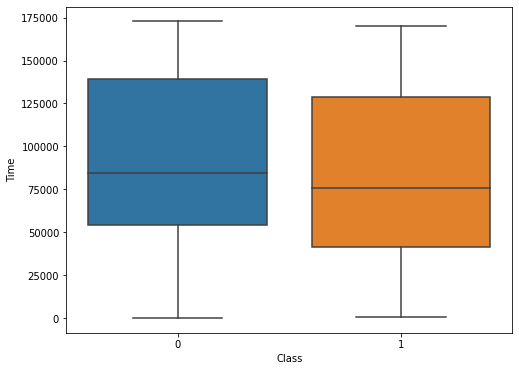

In [7]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='Class', y='Time', data=creditcard)
plt.show()

* V1 ~ V28 변수에 대한 boxplot

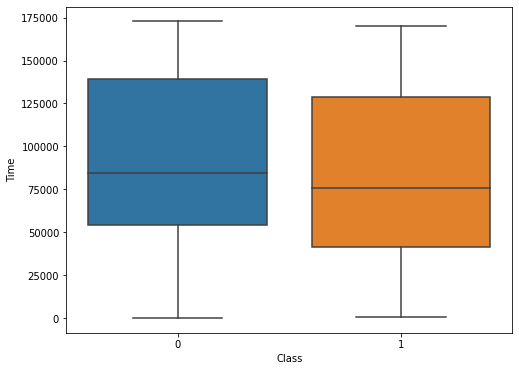

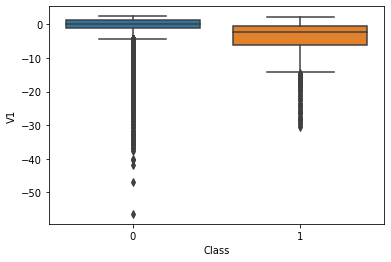

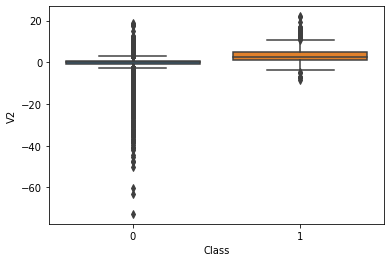

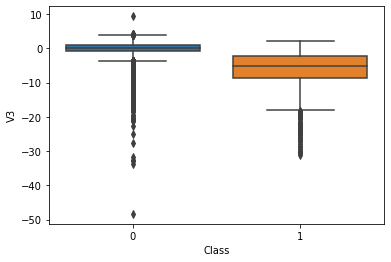

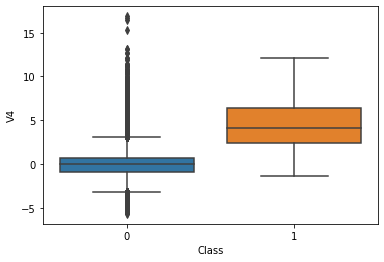

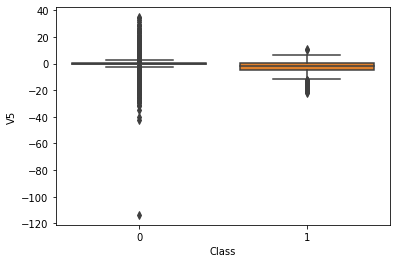

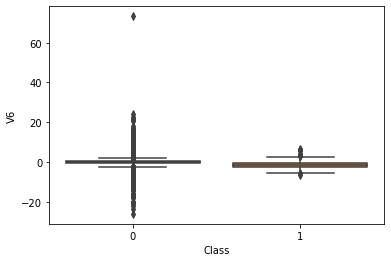

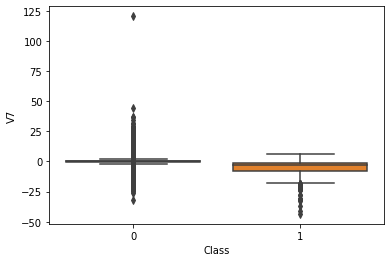

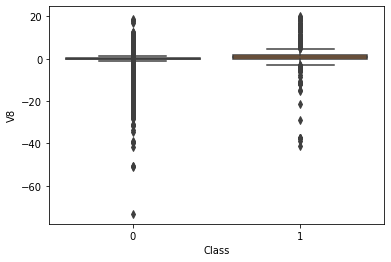

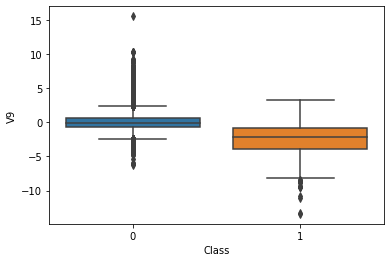

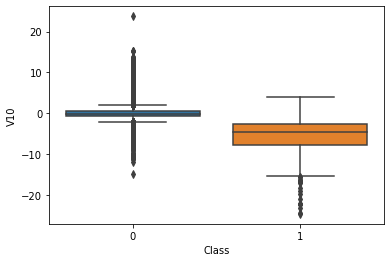

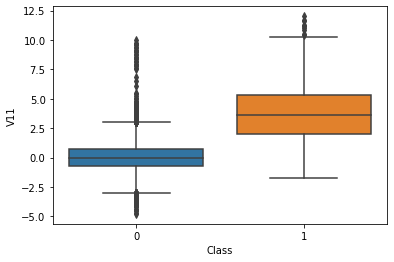

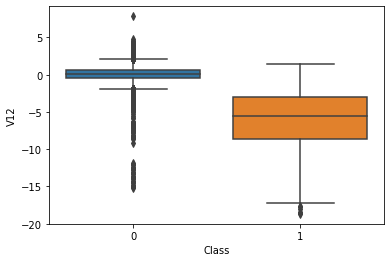

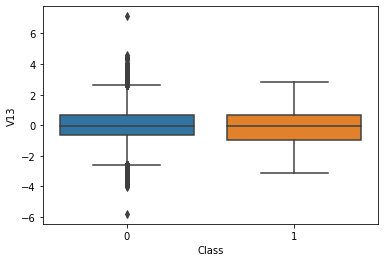

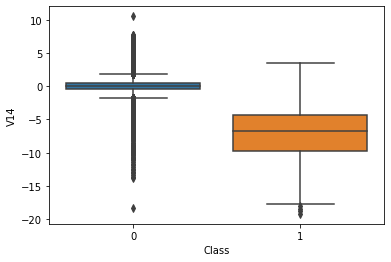

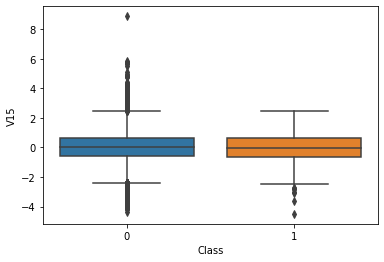

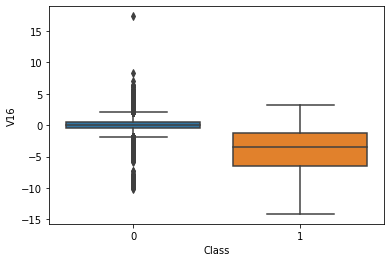

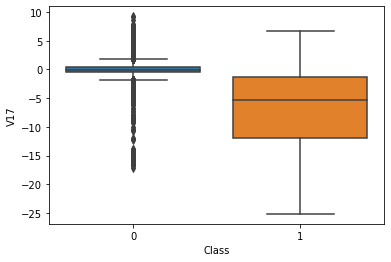

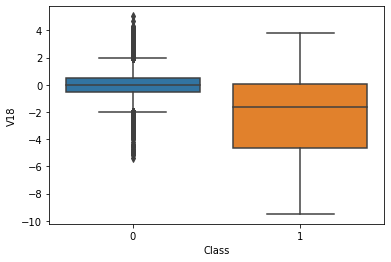

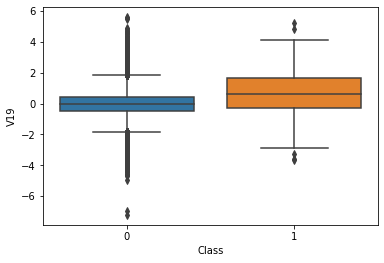

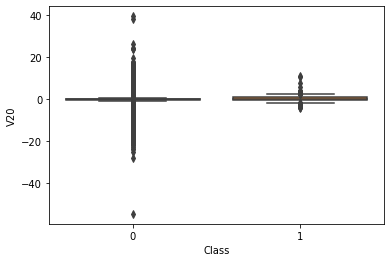

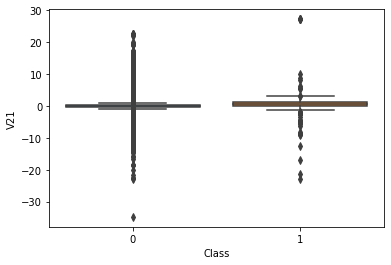

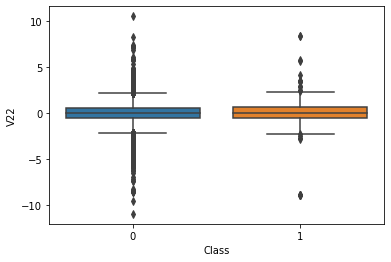

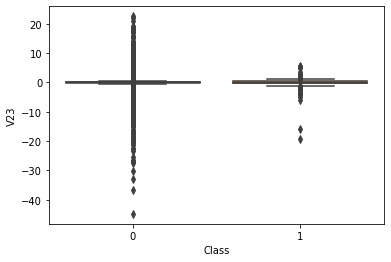

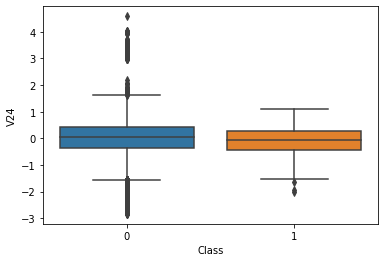

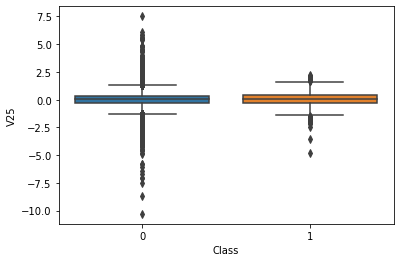

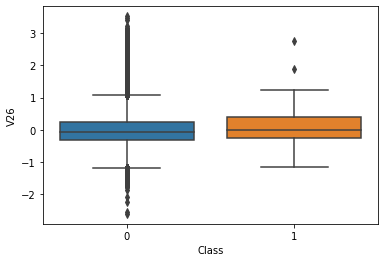

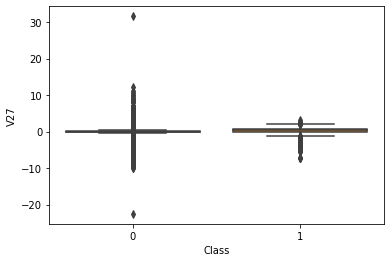

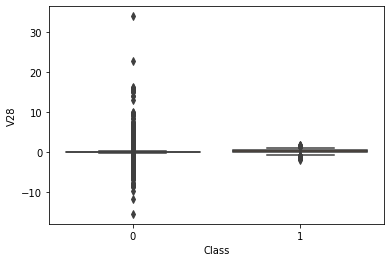

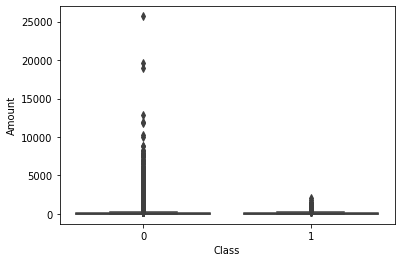

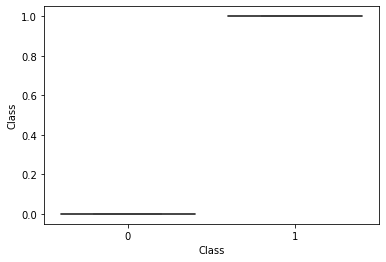

In [8]:
v = creditcard.columns
plt.subplots(figsize=(8, 6))
for i in v:   
    sns.boxplot(x='Class', y= i, data=creditcard)
    plt.show()

* Amount 변수에 대한 boxplot

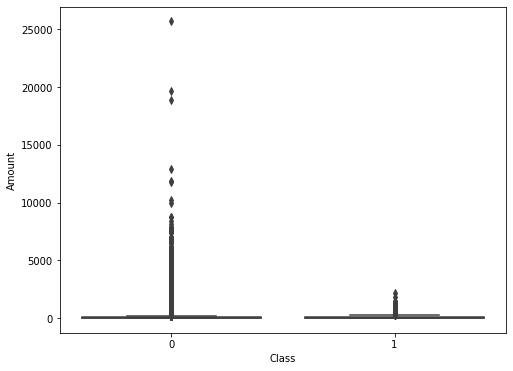

In [9]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=creditcard)
plt.show()

### 2. 각 입력변수들에 대한 Q1, Q2,Q3 값을 계산하시오. 

In [10]:
variables = list(creditcard.columns[:-1])

Q1 = [creditcard[col].quantile(0.25) for col in variables]
Q2 = [creditcard[col].quantile(0.5) for col in variables]
Q3 = [creditcard[col].quantile(0.75) for col in variables]

In [11]:
quantiles = pd.DataFrame([Q1,Q2,Q3],columns = variables, index = ["Q1","Q2","Q3"])
quantiles

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Q1,54201.5,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600
Q2,84692.0,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000
Q3,139320.5,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165


In [12]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 3. 로지스틱 회귀분석을 수행하여, 부정사용 여부에 대한 예측 모델을 수립하시오. 이 때 필요한 변수선택 절차를 수행하시오. AIC 값에 의해 선택된 최종 모형의 입력변수에 대한 기울기와 p-value를 표로 제시하시오.

####  Fitting Full model 
* 모든 변수를 활용하여 로지스틱 회귀분석을 수행결과 신용카드 부정사용 여부에 유의미한 영향을 끼치는 변수 (p-value가 0.05이하)는 *Time, V1,V4,V8,V9,V10,V13,V14,V20,V21,V22,V27,V28,Amount임* 
    * 그 중 신용카드 부정사용 확률과 비례관계를 가지는 변수는 V1,V4,V21,V22,Amount임.
    * 그 중 신용카드 부정사용 확률과 반비례관계를 가지는 변수는 Time ,V8,V9,V10,V13,V14,V20,V27,V28임 
* 즉, Amount(사용금액)과 V1,V4,V21,V22는 커질수록 신용카드의 부정사용 확률이 커짐.  
* 반면, Time (첫번째 거래와의 시간차이, 초)과 V8,V9,V10,V13,V14,V20,V27,V28은 커질 수록 신용카드의 부정사용 확률이 작아짐. 

In [13]:
model = smf.glm(formula='Class ~ Time+V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount',
               data=creditcard, family=sm.families.Binomial())   
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                            GLM   Df Residuals:                   284776
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1114.8
Date:                Mon, 12 Apr 2021   Deviance:                       2229.5
Time:                        03:39:30   Pearson chi2:                 7.40e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3917      0.249    -33.652      0.000      -8.880      -7.903
Time       -3.742e-06   2.26e-06     -1.659      0.097   -8.16e-06    6.79e-07
V1             0.0960      0.042      2.264      0.024       0.013       0.179
V2             0.0094      0.058      0.161      0.872      -0.104       0.123
V3            -0.0079      0.053     -0.149      0.881      -0.112       0.096
V4             0.6986      0.074      9.454      0.000       0.554       0.843
V5             0.1295      0.067      1.944      0.052      -0.001       0.260
V6            -0.1198      0.074     -1.626      0.104      -0.264       0.025
V7            -0.0969      0.067     -1.453      0.146      -0.228       0.034
V8            -0.1739      0.030     -5.711      0.000      -0.234      -0.114
V9            -0.2843      0.111     -2.561      0.010      -0.502      -0.067
V10           -0.8176      0.097     -8.432      0.000      -1.008      -0.628
V11           -0.0621      0.081     -0.762      0.446      -0.222       0.098
V12            0.0909      0.087      1.045      0.296      -0.080       0.261
V13           -0.3312      0.082     -4.058      0.000      -0.491      -0.171
V14           -0.5571      0.062     -8.949      0.000      -0.679      -0.435
V15           -0.1141      0.086     -1.330      0.183      -0.282       0.054
V16           -0.1908      0.125     -1.526      0.127      -0.436       0.054
V17           -0.0216      0.070     -0.309      0.757      -0.159       0.116
V18           -0.0131      0.129     -0.102      0.919      -0.266       0.240
V19            0.0963      0.097      0.993      0.321      -0.094       0.286
V20           -0.4582      0.082     -5.607      0.000      -0.618      -0.298
V21            0.3898      0.060      6.494      0.000       0.272       0.507
V22            0.6297      0.134      4.707      0.000       0.367       0.892
V23           -0.0951      0.058     -1.629      0.103      -0.209       0.019
V24            0.1289      0.147      0.874      0.382      -0.160       0.418
V25           -0.0761      0.131     -0.582      0.560      -0.332       0.180
V26            0.0195      0.190      0.103      0.918      -0.352       0.392
V27           -0.8188      0.122     -6.686      0.000      -1.059      -0.579
V28           -0.2937      0.088     -3.332      0.001      -0.467      -0.121
Amount         0.0009      0.000      2.449      0.014       0.000       0.002
==============================================================================
"""

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                            GLM   Df Residuals:                   284776
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1114.8
Date:                Mon, 12 Apr 2021   Deviance:                       2229.5
Time:                        03:39:30   Pearson chi2:                 7.40e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3917      0.249    -33.652      0.000      -8.880      -7.903
Time       -3.742e-06   2.26e-06     -1.659      0.097   -8.16e-06    6.79e-07
V1             0.0960      0.042      2.264      0.024       0.013       0.179
V2             0.0094      0.058      0.161      0.872      -0.104       0.123
V3            -0.0079      0.053     -0.149      0.881      -0.112       0.096
V4             0.6986      0.074      9.454      0.000       0.554       0.843
V5             0.1295      0.067      1.944      0.052      -0.001       0.260
V6            -0.1198      0.074     -1.626      0.104      -0.264       0.025
V7            -0.0969      0.067     -1.453      0.146      -0.228       0.034
V8            -0.1739      0.030     -5.711      0.000      -0.234      -0.114
V9            -0.2843      0.111     -2.561      0.010      -0.502      -0.067
V10           -0.8176      0.097     -8.432      0.000      -1.008      -0.628
V11           -0.0621      0.081     -0.762      0.446      -0.222       0.098
V12            0.0909      0.087      1.045      0.296      -0.080       0.261
V13           -0.3312      0.082     -4.058      0.000      -0.491      -0.171
V14           -0.5571      0.062     -8.949      0.000      -0.679      -0.435
V15           -0.1141      0.086     -1.330      0.183      -0.282       0.054
V16           -0.1908      0.125     -1.526      0.127      -0.436       0.054
V17           -0.0216      0.070     -0.309      0.757      -0.159       0.116
V18           -0.0131      0.129     -0.102      0.919      -0.266       0.240
V19            0.0963      0.097      0.993      0.321      -0.094       0.286
V20           -0.4582      0.082     -5.607      0.000      -0.618      -0.298
V21            0.3898      0.060      6.494      0.000       0.272       0.507
V22            0.6297      0.134      4.707      0.000       0.367       0.892
V23           -0.0951      0.058     -1.629      0.103      -0.209       0.019
V24            0.1289      0.147      0.874      0.382      -0.160       0.418
V25           -0.0761      0.131     -0.582      0.560      -0.332       0.180
V26            0.0195      0.190      0.103      0.918      -0.352       0.392
V27           -0.8188      0.122     -6.686      0.000      -1.059      -0.579
V28           -0.2937      0.088     -3.332      0.001      -0.467      -0.121
Amount         0.0009      0.000      2.449      0.014       0.000       0.002
==============================================================================
"""

#### Goodness of Fit
* 적합성 판정 결과, 해당 모델은 p-value가 0.05이하로, 적합하다고 볼 수 없음. 

In [15]:
import gof_logistic as gof
gof.HosmerLemeshow(results, creditcard['Class'])

,Chi2,p - value
0,0.99,0.01


#### Variable Selection 
* 외부 매크로 파일을 이용해서 변수 선택을 진행했을때, AIC값에 의해 최종 선택된 변수들은 *V14,V4,C16,V10,V8,V5,V21,V22,V13,V23*임

In [16]:
import feature_selection as fsel

X = creditcard.drop(['Class'], axis=1)
y = creditcard['Class']

fsel.forwardSelection(X, y, model_type='logistic', elimination_criteria='aic') 

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.012715
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.012638
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.011420
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.010178
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.008941
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.008395
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.011545
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.012045
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009688
         Iterations 11
Optimi

Optimization terminated successfully.
         Current function value: 0.004645
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004612
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004629
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004625
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004670
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004665
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004648
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004670
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004670
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.004129
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004128
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004132
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004132
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004111
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004128
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004132
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004133
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004131
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.004030
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004031
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004033
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004029
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004032
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004032
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004007
         Iterations 12
Entered : V13 	AIC : 2302.5326769995827
Optimization terminated successfully.
         Current function value: 0.004007
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.004007
         Iterations 12
Optimization terminated successfu

['intercept',
 'V14',
 'V4',
 'V16',
 'V10',
 'V8',
 'V5',
 'V21',
 'V22',
 'V13',
 'V23']

#### 최종 모형 
* 선택된 변수로 로지스틱 회귀분석을 수행했을 때의 결과는 다음과 같음. 

In [17]:
#선택된 변수로 구성된 모형 fitting 
model = smf.glm(formula='Class ~ V14+V4+V16+V10+V8+V5+V21+V22+V13+V23',
               data=creditcard, family=sm.families.Binomial())
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                            GLM   Df Residuals:                   284796
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1137.7
Date:                Mon, 12 Apr 2021   Deviance:                       2275.4
Time:                        03:44:19   Pearson chi2:                 1.18e+06
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5105      0.123    -69.345      0.000      -8.751      -8.270
V14           -0.7161      0.033    -21.812      0.000      -0.780      -0.652
V4             0.6045      0.041     14.685      0.000       0.524       0.685
V16           -0.2958      0.050     -5.955      0.000      -0.393      -0.198
V10           -0.4610      0.044    -10.561      0.000      -0.547      -0.375
V8            -0.1916      0.019     -9.980      0.000      -0.229      -0.154
V5             0.0722      0.022      3.266      0.001       0.029       0.116
V21            0.3328      0.053      6.301      0.000       0.229       0.436
V22            0.6203      0.116      5.347      0.000       0.393       0.848
V13           -0.2955      0.077     -3.835      0.000      -0.447      -0.144
V23           -0.1293      0.048     -2.720      0.007      -0.223      -0.036
==============================================================================
"""

In [18]:
pvalues = list(results.pvalues)
coefficients=list(results.params)

In [19]:
gof.HosmerLemeshow(results, creditcard['Class'])

,Chi2,p - value
0,1.0,0.0


### 4. 최종모형에서 선택된 입력변수들에 대해서 1번의 boxplot결과와 결부시켜 discuss하시오

	최종모형에서 선택된 입력변수 들은 모두 p-value가 0.05보다 작다. 즉, 해당 입력변수들이 신용카드의 부정사용 확률에 유의한 영향을 끼친다고 해석할 수 있다.  
	최종모형에서 선택된 입력변수들 중 V4,V5,V21,V22는 양의 기울기 값을 가진다. 즉, 해당 변수의 값이 높아질수록 신용카드의 부정사용 확률이 높아진다. 
	V4의 boxplot결과를 보면, Class=0일때보다 Class=1일 때 V4의 값이 더 크게 분포한다는 것을 알 수 있다. 
	V5,V21,V22는 앞선 boxplot에서 목표변수와의 확연한 관계성을 보여주진 않았다. 이는 아웃라이어의 영향을 받은 결과라고 추측할 수 있다. 
	최종 모형에서 선택된 입력변수들 중 V14,V16,V10,V8,V13,V23은 음의 기울기 값을 가진다. 즉, 해당 변수의 값이 높아질수록 신용카드의 부정사용 확률은 낮아진다. 
	V14, V16, V10 의 boxplot결과를 보면, Class=0일때보다 Class=1일 때 값이 더 작게 분포한다는 것을 알 수 있다.
	V5,V21,V22는 앞선 boxplot에서 목표변수와의 확연한 관계성을 보여주진 않았다. 이는 아웃라이어의 영향을 받은 결과라고 추측할 수 있다. 


### 5. 최종모형에서 선택된 입력변수들에 대한 odds ratio를 해석하시오. 

In [20]:
np.exp(results.params)

Intercept    0.000201
V14          0.488667
V4           1.830279
V16          0.743928
V10          0.630642
V8           0.825615
V5           1.074865
V21          1.394799
V22          1.859486
V13          0.744161
V23          0.878676
dtype: float64

### 6. 최종모형에서 선택된 입력변수들의 값이 해당변수의 Q3과 일치하는 어떤 관찰값이 있다고 하자. 이 관찰값에 대한 부정 사용의 확률을 계산하시오. 

In [21]:
q3 = quantiles.loc["Q3",['V14', 'V4', 'V16', 'V10', 'V8', 'V5', 'V21', 'V22', 'V13', 'V23']]
q3

V14    0.493150
V4     0.743341
V16    0.523296
V10    0.453923
V8     0.327346
V5     0.611926
V21    0.186377
V22    0.528554
V13    0.662505
V23    0.147642
Name: Q3, dtype: float64

In [22]:
q3

V14    0.493150
V4     0.743341
V16    0.523296
V10    0.453923
V8     0.327346
V5     0.611926
V21    0.186377
V22    0.528554
V13    0.662505
V23    0.147642
Name: Q3, dtype: float64

In [23]:
results.predict(q3)

Q3    0.00018
dtype: float64